In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C20_ro_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n55          5.7937 ( 5.5323,  6.5182) ( 5.5195,  6.3221)  0.8026 (Jnode 106)\n',
 't_n56          5.5834 ( 5.0511,  6.3154) ( 4.9783,  6.2177)  1.2394 (Jnode 105)\n',
 't_n57          5.2270 ( 4.7141,  5.9156) ( 4.6493,  5.8266)  1.1773 (Jnode 104)\n',
 't_n58          4.4079 ( 3.9606,  5.0014) ( 3.9178,  4.9375)  1.0197 (Jnode 103)\n',
 't_n59          4.2655 ( 3.8287,  4.8404) ( 3.7813,  4.7736)  0.9922 (Jnode 102)\n',
 't_n60          4.0715 ( 3.6545,  4.6242) ( 3.6104,  4.5629)  0.9525 (Jnode 101)\n',
 't_n61          3.7957 ( 3.3994,  4.3160) ( 3.3709,  4.2678)  0.8970 (Jnode 100)\n',
 't_n62          1.7052 ( 1.4438,  2.0117) ( 1.4319,  1.9940)  0.5620 (Jnode 99)\n',
 't_n63          2.6573 ( 2.3536,  3.0425) ( 2.3377,  3.0156)  0.6779 (Jnode 98)\n',
 't_n64          1.9019 ( 1.6618,  2.1966) ( 1.6380,  2.1632)  0.5252 (Jnode 97)\n',
 't_n65          1.6781 ( 1.4608,  1.9452) ( 1.4500,  1.9233)  0.4733 (Jnode 96)\n',
 't_n66          1.3161 ( 1.1369,  1.5382) ( 1.1232,  1.51

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    lower_ci_iqtree.append(float(line[3][:-1]))
    upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
    
for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
    
for line in var_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_iqtree.append(float(line[1]))
    lower_ci_var_iqtree.append(float(line[3][:-1]))
    upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [6]:
posterior_mean_iqtree

[5.7937,
 5.5834,
 5.227,
 4.4079,
 4.2655,
 4.0715,
 3.7957,
 1.7052,
 2.6573,
 1.9019,
 1.6781,
 1.3161,
 0.9053,
 0.6073,
 0.2428,
 2.0104,
 4.1554,
 3.9589,
 3.7838,
 2.7173,
 2.4421,
 2.1306,
 4.0526,
 3.8656,
 3.7073,
 3.4853,
 3.1901,
 3.0947,
 2.725,
 2.4935,
 2.3014,
 1.7486,
 1.6091,
 2.7397,
 2.2272,
 3.9783,
 0.8889,
 3.8639,
 3.6275,
 3.2647,
 3.0361,
 2.2532,
 2.5725,
 3.1189,
 2.9946,
 2.7638,
 2.1061,
 2.6988,
 4.7168,
 3.4901,
 2.1945,
 1.6578,
 3.9972]

In [7]:
lower_ci_iqtree

[5.5323,
 5.0511,
 4.7141,
 3.9606,
 3.8287,
 3.6545,
 3.3994,
 1.4438,
 2.3536,
 1.6618,
 1.4608,
 1.1369,
 0.7728,
 0.5135,
 0.1983,
 1.7553,
 3.729,
 3.5422,
 3.3872,
 2.3971,
 2.1393,
 1.8162,
 3.6359,
 3.4648,
 3.3196,
 3.1165,
 2.8513,
 2.7651,
 2.4244,
 2.2156,
 2.0409,
 1.5411,
 1.4121,
 2.4344,
 1.9654,
 3.5686,
 0.6948,
 3.465,
 3.2523,
 2.9214,
 2.7119,
 1.987,
 2.2853,
 2.7877,
 2.6734,
 2.4592,
 1.8467,
 2.3753,
 4.2444,
 3.0806,
 1.8639,
 1.3447,
 3.4976]

In [8]:
upper_ci_iqtree

[6.5182,
 6.3154,
 5.9156,
 5.0014,
 4.8404,
 4.6242,
 4.316,
 2.0117,
 3.0425,
 2.1966,
 1.9452,
 1.5382,
 1.065,
 0.7226,
 0.2971,
 2.3228,
 4.7173,
 4.4949,
 4.3009,
 3.1174,
 2.817,
 2.4947,
 4.5971,
 4.3832,
 4.2101,
 3.9612,
 3.629,
 3.5219,
 3.1054,
 2.8436,
 2.6307,
 2.0127,
 1.8543,
 3.1276,
 2.5532,
 4.5124,
 1.117,
 4.3871,
 4.1211,
 3.7104,
 3.4577,
 2.5857,
 2.9451,
 3.5451,
 3.4084,
 3.1518,
 2.4235,
 3.0988,
 5.3484,
 3.9968,
 2.5781,
 2.0137,
 4.7238]

In [9]:
file_LG = open("LG_ro_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    lower_ci_baseml.append(float(line[3][:-1]))
    upper_ci_baseml.append(float(line[4][:-1]))
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
for line in var_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_baseml.append(float(line[1]))
    lower_ci_var_baseml.append(float(line[3][:-1]))
    upper_ci_var_baseml.append(float(line[4][:-1]))

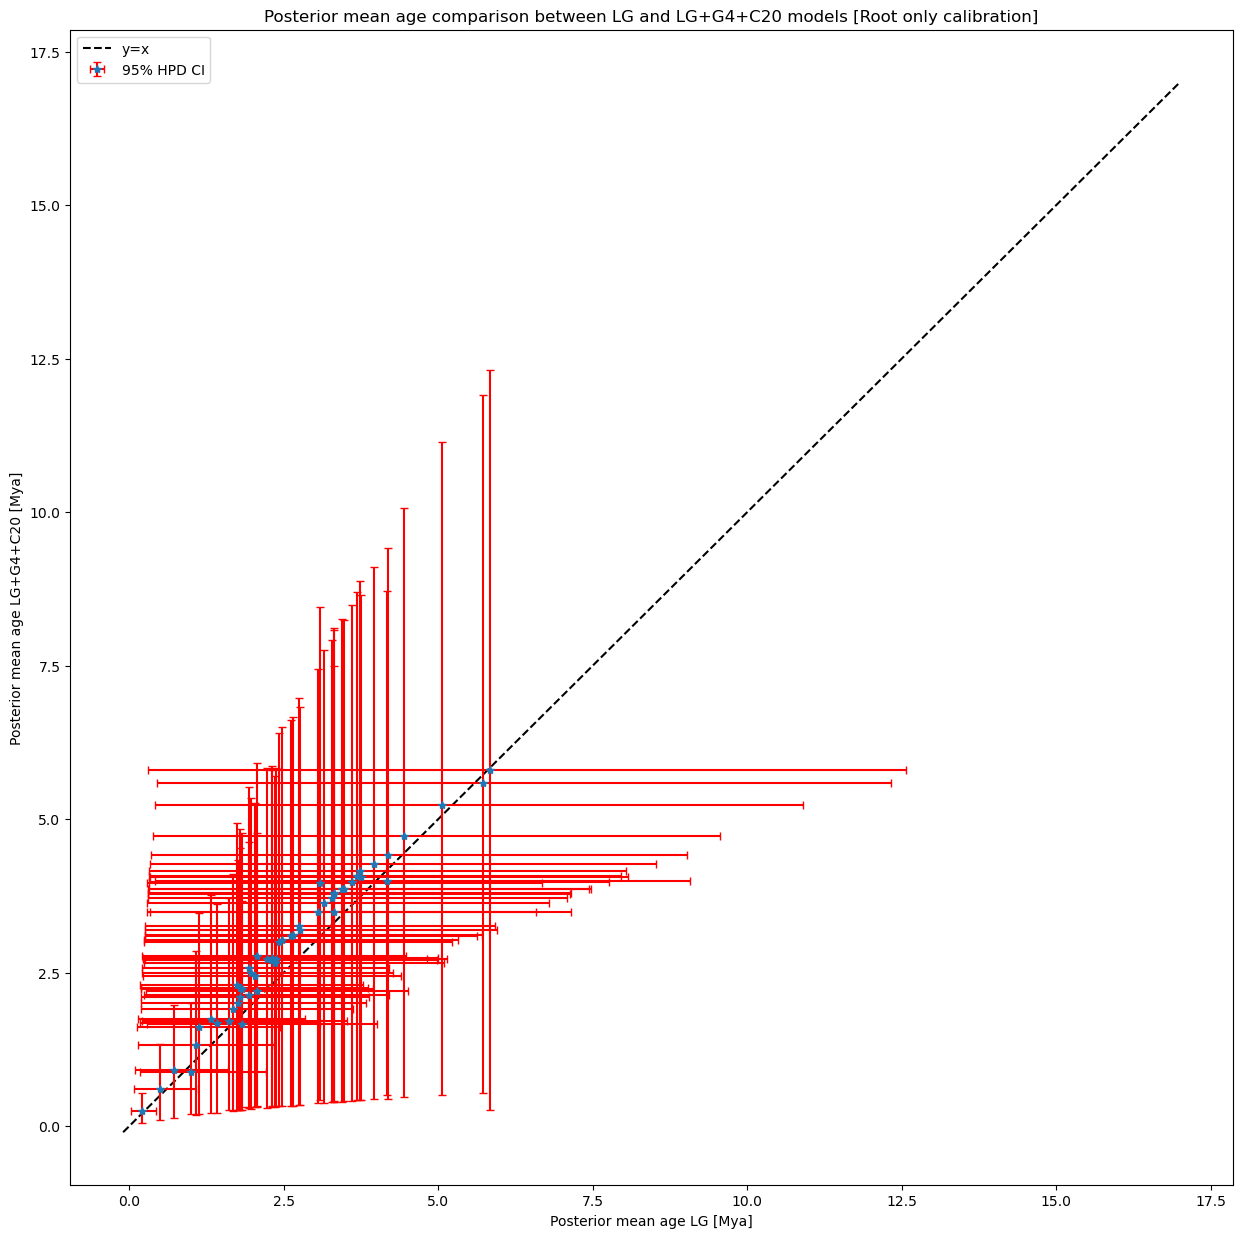

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4+C20 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C20 models [Root only calibration]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C20_ro.png')

In [11]:
posterior_mean_baseml

[5.844,
 5.7246,
 5.0653,
 4.1838,
 3.957,
 3.6887,
 3.3154,
 1.6179,
 2.3531,
 1.6722,
 1.4207,
 1.0802,
 0.7313,
 0.4918,
 0.1981,
 1.7656,
 3.7264,
 3.0895,
 3.3043,
 2.3781,
 2.0301,
 1.9355,
 3.7421,
 3.467,
 3.2861,
 3.0496,
 2.7576,
 2.6108,
 2.2307,
 1.977,
 1.749,
 1.3151,
 1.1253,
 2.3166,
 1.8225,
 3.6053,
 0.9995,
 3.4486,
 3.154,
 2.7417,
 2.4651,
 1.7874,
 1.9429,
 2.6505,
 2.421,
 2.068,
 1.7902,
 2.301,
 4.4379,
 3.3113,
 2.0674,
 1.8282,
 4.1752]

In [12]:
posterior_mean_iqtree

[5.7937,
 5.5834,
 5.227,
 4.4079,
 4.2655,
 4.0715,
 3.7957,
 1.7052,
 2.6573,
 1.9019,
 1.6781,
 1.3161,
 0.9053,
 0.6073,
 0.2428,
 2.0104,
 4.1554,
 3.9589,
 3.7838,
 2.7173,
 2.4421,
 2.1306,
 4.0526,
 3.8656,
 3.7073,
 3.4853,
 3.1901,
 3.0947,
 2.725,
 2.4935,
 2.3014,
 1.7486,
 1.6091,
 2.7397,
 2.2272,
 3.9783,
 0.8889,
 3.8639,
 3.6275,
 3.2647,
 3.0361,
 2.2532,
 2.5725,
 3.1189,
 2.9946,
 2.7638,
 2.1061,
 2.6988,
 4.7168,
 3.4901,
 2.1945,
 1.6578,
 3.9972]

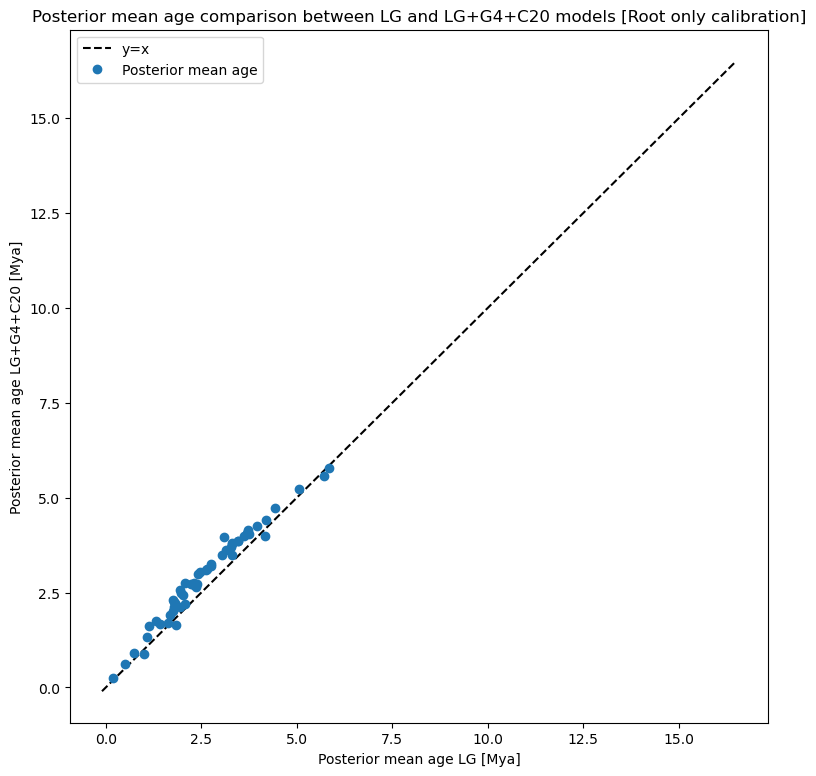

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9, 9))
ax.plot([-0.1,16.5], 
        [-0.1, 16.5], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4+C20 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C20 models [Root only calibration]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C20_ro_scatter.png')

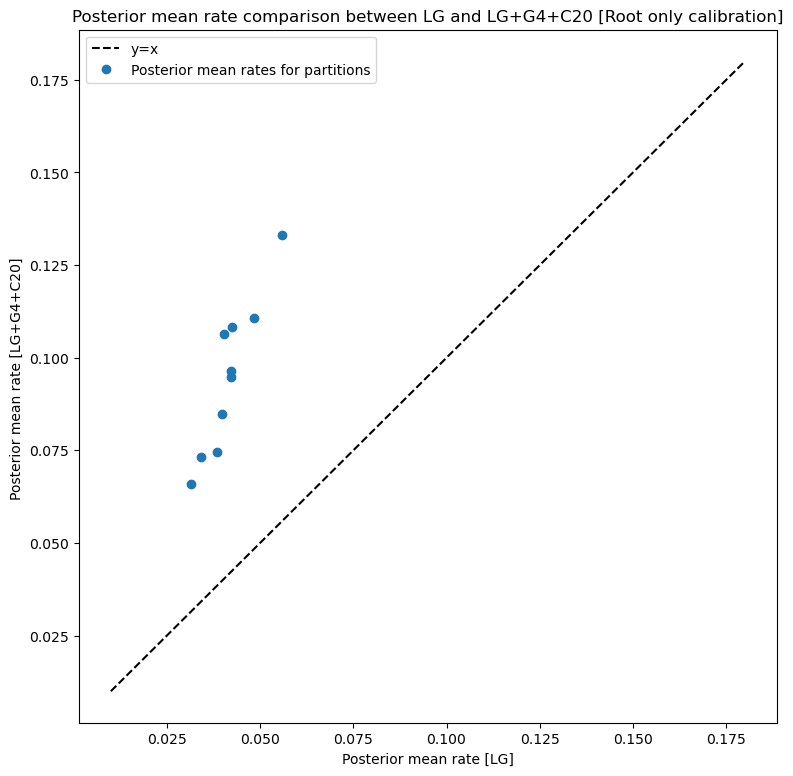

In [14]:
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([0.01,0.18], 
        [0.01, 0.18], 
        'k--', label='y=x')
ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
 
# Labels and title
ax.set_xlabel('Posterior mean rate [LG]')
ax.set_ylabel('Posterior mean rate [LG+G4+C20] ')
ax.set_title('Posterior mean rate comparison between LG and LG+G4+C20 [Root only calibration]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_rate_comparison_LG_G4_C20_ro_scatter.png')